In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('smsspamcollection.csv')
#df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1238,ham,"Dear relieved of westonzoyland, all going to p..."
3184,ham,Good morning pookie pie! Lol hope I didn't wak...
124,ham,Ü predict wat time ü'll finish buying?
1947,ham,The battery is for mr adewale my uncle. Aka Egbon
4288,ham,Hey mr whats the name of that bill brison book...


In [4]:
df.shape

(5571, 2)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   ham                                                                                                              5571 non-null   object
 1   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# drop last 3 cols
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1136,spam,Dont forget you can place as many FREE Request...
349,ham,Just checking in on you. Really do miss seeing...
4534,ham,I have no money 4 steve mate! !
1477,ham,Why you keeping me away like this
699,ham,K..u also dont msg or reply to his msg..


In [9]:
# renaming the cols
#df.rename(columns={'v1':'target','v2':'text'},inplace=True)
#df.sample(5)

df.rename(columns={'ham':'target','Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...':'text'},inplace=True)
df.sample(5)

,target,text
4049,ham,Yeah that's the impression I got
5167,ham,"I‘ve got some salt, you can rub it in my open ..."
7,spam,WINNER!! As a valued network customer you have...
1653,ham,I was at bugis juz now wat... But now i'm walk...
1433,ham,You intrepid duo you! Have a great time and se...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [13]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [14]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5168, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [19]:
df['target'].value_counts()

,count
target,
0,4515
1,653


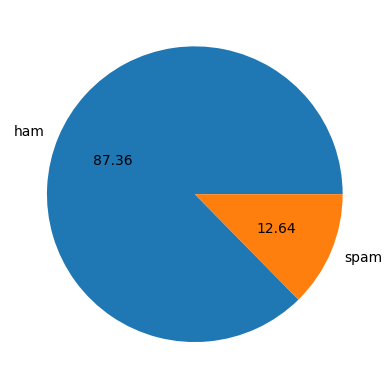

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
 df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,Ok lar... Joking wif u oni...,29
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,0,U dun say so early hor... U c already then say...,49
3,0,"Nah I don't think he goes to usf, he lives aro...",61
4,1,FreeMsg Hey there darling it's been 3 week's n...,147


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,Ok lar... Joking wif u oni...,29,8
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
2,0,U dun say so early hor... U c already then say...,49,13
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Ok lar... Joking wif u oni...,29,8,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,79.338429,18.610294,1.974652
std,58.441452,13.420613,1.460245
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.250000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4515.000000,4515.000000,4515.000000
mean,70.897010,17.286157,1.828350
std,56.718188,13.609761,1.395922
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.765697,2.986217
std,29.821348,6.992892,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

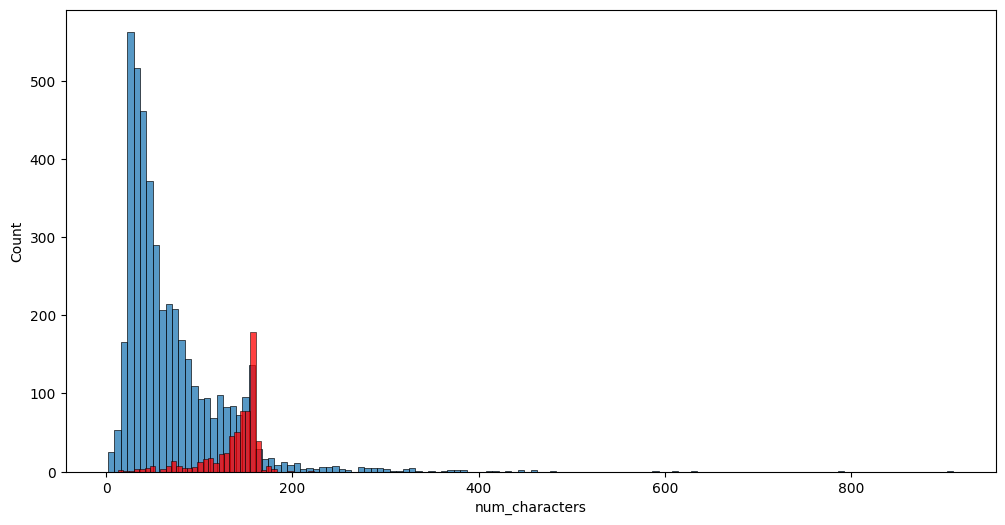

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

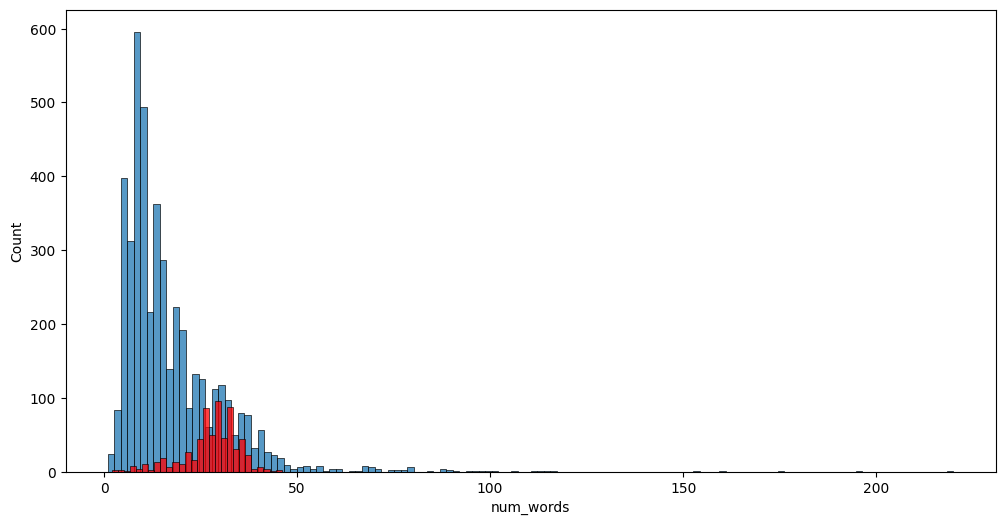

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

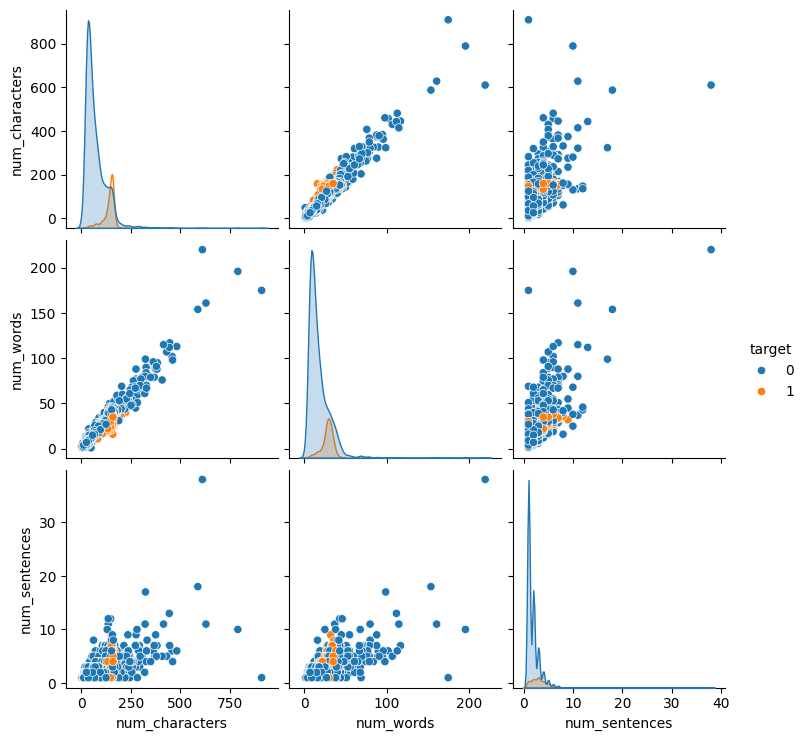

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

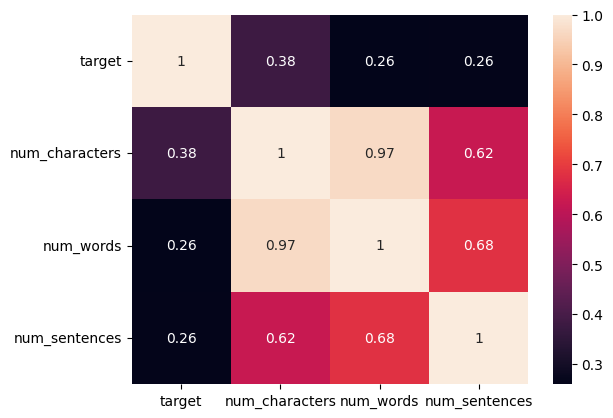

In [38]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
df['text'][0]

'Ok lar... Joking wif u oni...'

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [48]:
!pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

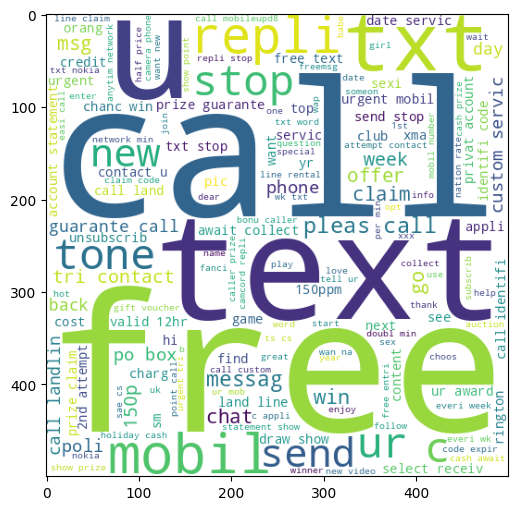

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

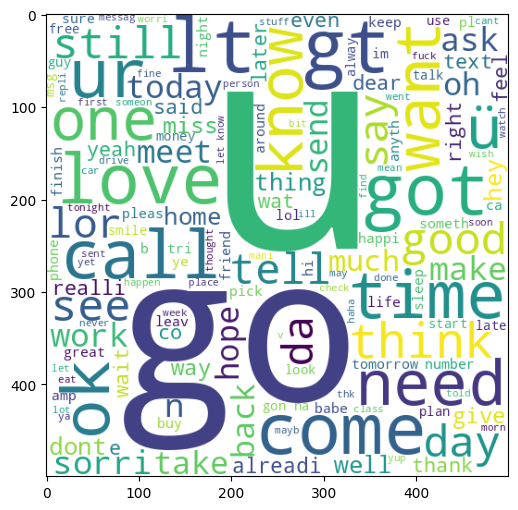

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [55]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [56]:
len(spam_corpus)

9983

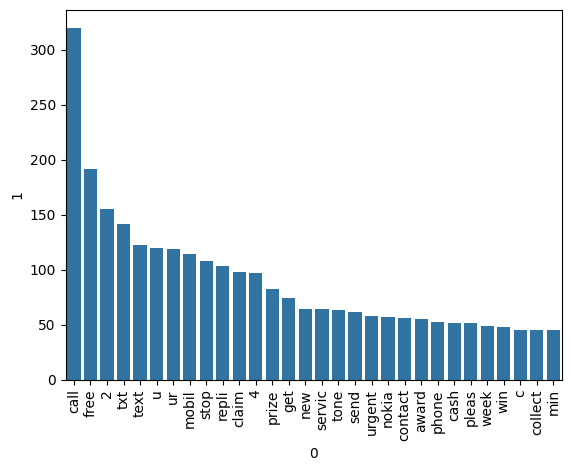

In [57]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35939

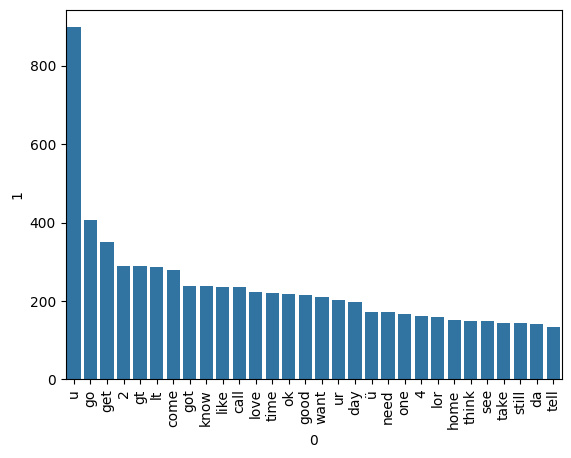

In [60]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


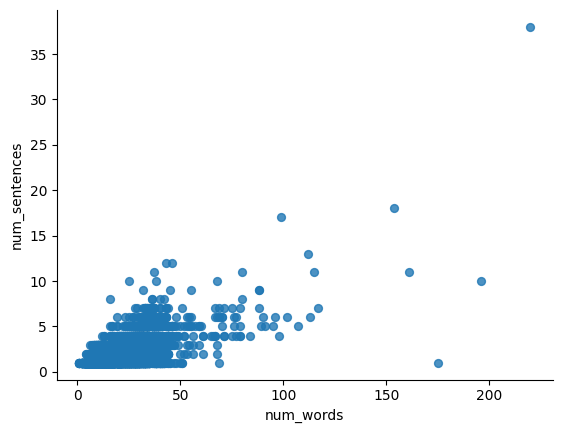

In [62]:
# @title num_words vs num_sentences

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='num_words', y='num_sentences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

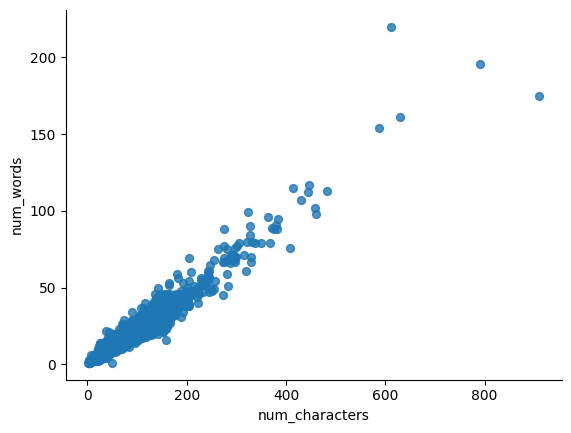

In [63]:
# @title num_characters vs num_words

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='num_characters', y='num_words', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 4. Model Building

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [67]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [68]:
X.shape

(5168, 3000)

In [69]:
y = df['target'].values

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 111]
 [ 23 112]]
0.5022421524663677


In [75]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [76]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[898   1]
 [ 17 118]]
0.9915966386554622


In [77]:
# tfidf --> MNB

In [78]:
!pip install xgboost

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#import XGBClassifier

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9827586206896551)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9827586206896551
For  KN
Accuracy -  0.9129593810444874
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  0.9905660377358491
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8476190476190476
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9578947368421052
For  RF
Accuracy -  0.9748549323017408
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8968253968253969
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9666666666666667
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9550561797752809
For  xgb
Accuracy -  0.971953578336557
Precision -  0.9649122807017544


In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912959,1.000000
5,RF,0.974855,0.990991
2,NB,0.970019,0.990566
0,SVC,0.977756,0.982759
8,ETC,0.977756,0.966667
10,xgb,0.971954,0.964912
4,LR,0.953578,0.957895
9,GBDT,0.947776,0.955056
7,BgC,0.966151,0.896825
3,DT,0.940039,0.847619


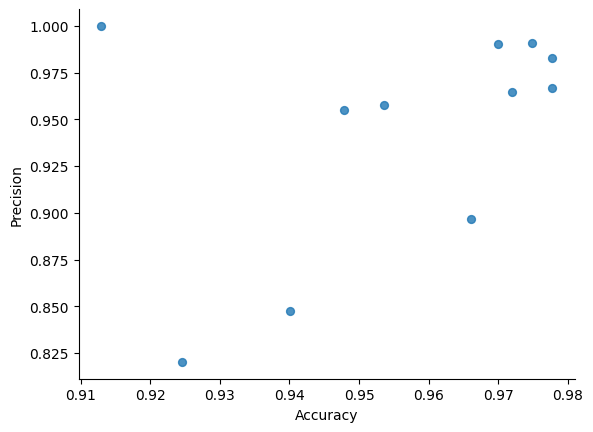

In [87]:
# @title Accuracy vs Precision

from matplotlib import pyplot as plt
performance_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912959
1,RF,Accuracy,0.974855
2,NB,Accuracy,0.970019
3,SVC,Accuracy,0.977756
4,ETC,Accuracy,0.977756
5,xgb,Accuracy,0.971954
6,LR,Accuracy,0.953578
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.966151
9,DT,Accuracy,0.940039


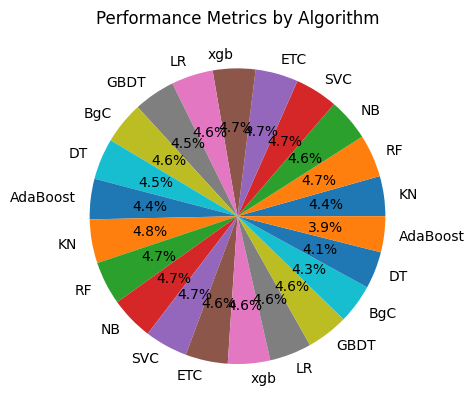

In [90]:
# prompt: visualize the performance_df1 with pie chart

import matplotlib.pyplot as plt
plt.pie(performance_df1['value'], labels=performance_df1['Algorithm'], autopct='%1.1f%%')
plt.title('Performance Metrics by Algorithm')
plt.show()

/tmp/ipython-input-91-2326188885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(performance_df1, x='value', y='variable', inner='stick', palette='Dark2')


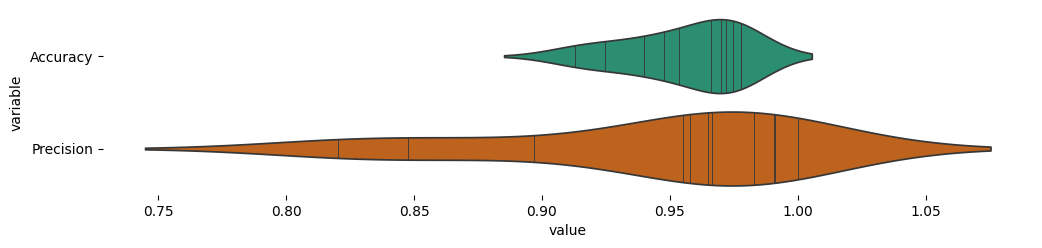

In [91]:
# @title variable vs value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_df1['variable'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_df1, x='value', y='variable', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [92]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=performance_df1)

https://docs.google.com/spreadsheets/d/1LDAiijaB5Rt2srJQoRw59ymY4HsBsO_aQnnP3GmNsKw/edit#gid=0


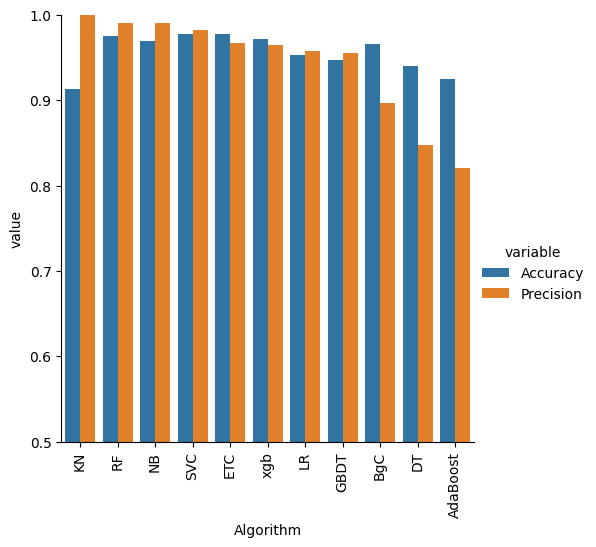

In [93]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [97]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [98]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [100]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000
1,RF,0.974855,0.990991,0.974855,0.990991,0.974855,0.990991,0.974855,0.990991
2,NB,0.970019,0.990566,0.970019,0.990566,0.970019,0.990566,0.970019,0.990566
3,SVC,0.977756,0.982759,0.977756,0.982759,0.977756,0.982759,0.977756,0.982759
4,ETC,0.977756,0.966667,0.977756,0.966667,0.977756,0.966667,0.977756,0.966667
5,xgb,0.971954,0.964912,0.971954,0.964912,0.971954,0.964912,0.971954,0.964912
6,LR,0.953578,0.957895,0.953578,0.957895,0.953578,0.957895,0.953578,0.957895
7,GBDT,0.947776,0.955056,0.947776,0.955056,0.947776,0.955056,0.947776,0.955056
8,BgC,0.966151,0.896825,0.966151,0.896825,0.966151,0.896825,0.966151,0.896825
9,DT,0.940039,0.847619,0.940039,0.847619,0.940039,0.847619,0.940039,0.847619


In [101]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
mnb.fit(X_train,y_train)

from sklearn.ensemble import VotingClassifier

In [102]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [103]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [104]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9917355371900827


In [105]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [106]:
from sklearn.ensemble import StackingClassifier

In [121]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, passthrough=False)

In [108]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9534883720930233


In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5874fb69de9e09bbf488857499ffb5486372455629135ff94fd4a3330ffd71de
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [112]:
from lime.lime_text import LimeTextExplainer
class_names=['0','1']
explainer = LimeTextExplainer(class_names=class_names)
idx = 30

# Create a wrapper function that vectorizes the input text before prediction
def predict_proba_wrapper(texts):
  transformed_texts = tfidf.transform(texts)
  return mnb.predict_proba(transformed_texts)

exp = explainer.explain_instance(df.text[idx], predict_proba_wrapper, num_features=6)
print('Document id: %d' % idx)
print('Probability=', mnb.predict_proba(tfidf.transform([df.text[idx]]))[0,1])
print('True class: %s' % df.target[idx])
exp.as_list()

Document id: 30
Probability= 0.037211629683134025
True class: 0


[(np.str_('got'), -0.05195442544749915),
 (np.str_('he'), 0.036150823982820886),
 (np.str_('Yeah'), -0.027229788486207263),
 (np.str_('that'), -0.022252224462211593),
 (np.str_('like'), -0.020578684319410977),
 (np.str_('child'), 0.018370169147231517)]

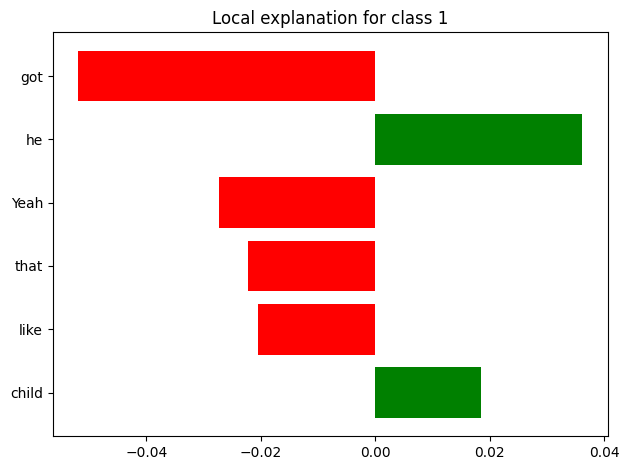

In [113]:
# prompt: visualize the lime result

exp.as_pyplot_figure()
plt.tight_layout()
plt.show()


Document id: 30
Original Text: Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You? 
Probability of Spam: 0.0372
True class: ham

Explanation (Word, Weight):
  got: -0.0529
  he: 0.0347
  Yeah: -0.0291
  that: -0.0224
  like: -0.0212
  child: 0.0183
  go: -0.0179
  there: 0.0122
  up: 0.0088
  caught: 0.0074


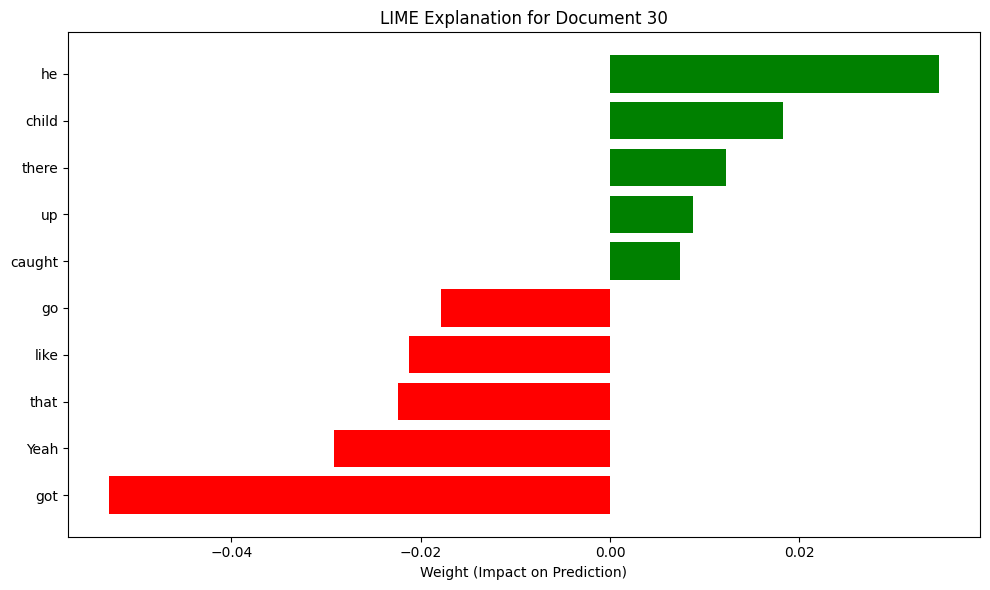

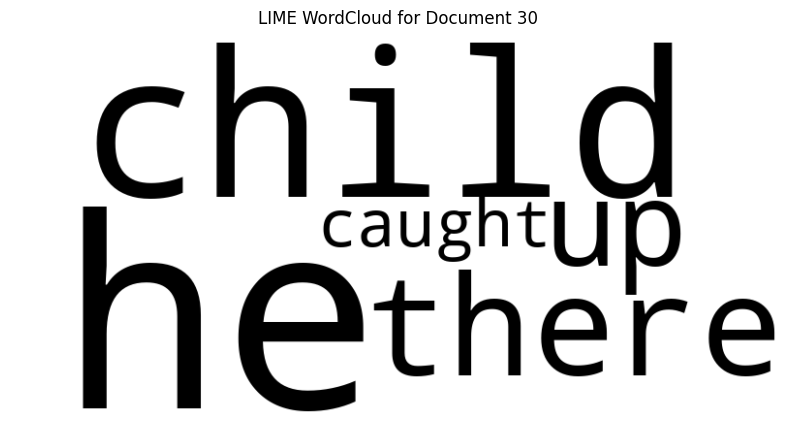

In [114]:
# prompt: Visualize the Lime result in a different way

from lime.lime_text import LimeTextExplainer

# Assuming 'tfidf' and 'mnb' are already trained and available
# Assuming 'df' with 'text' and 'target' columns exists

class_names = ['ham', 'spam'] # Use the actual class names

explainer = LimeTextExplainer(class_names=class_names)

idx_to_explain = 30 # Choose the index of the sample to explain

# Create a wrapper function that vectorizes the input text before prediction
def predict_proba_wrapper(texts):
  transformed_texts = tfidf.transform(texts)
  return mnb.predict_proba(transformed_texts)

# Generate the explanation
exp = explainer.explain_instance(df.text[idx_to_explain],
                                 predict_proba_wrapper,
                                 num_features=10) # Increase num_features for more words

print(f'Document id: {idx_to_explain}')
print(f'Original Text: {df.text[idx_to_explain]}')
print(f'Probability of Spam: {mnb.predict_proba(tfidf.transform([df.text[idx_to_explain]]))[0,1]:.4f}')
print(f'True class: {"spam" if df.target[idx_to_explain] == 1 else "ham"}')

# Get the explanation as a list of (word, weight) tuples
explanation_list = exp.as_list()
print("\nExplanation (Word, Weight):")
for word, weight in explanation_list:
    print(f"  {word}: {weight:.4f}")

# Alternative visualization using a horizontal bar plot
words = [item[0] for item in explanation_list]
weights = [item[1] for item in explanation_list]

# Sort by weight for better visualization
sorted_indices = np.argsort(weights)
words = [words[i] for i in sorted_indices]
weights = [weights[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(words, weights, color=['red' if w < 0 else 'green' for w in weights])
plt.xlabel("Weight (Impact on Prediction)")
plt.title(f"LIME Explanation for Document {idx_to_explain}")
plt.tight_layout()
plt.show()

# Another visualization: WordCloud with LIME weights
# You might need to adjust the font size based on the weights

def color_func(word, **kwargs):
    try:
        # Find the weight for the word in the explanation
        weight = next((w for w, text in explanation_list if text == word), 0)
        # Define color based on weight (green for positive, red for negative)
        if weight > 0:
            # Scale opacity based on absolute weight (higher weight = more opaque)
            opacity = min(1.0, abs(weight) * 5)  # Adjust scaling factor as needed
            return f"rgba(0, 128, 0, {opacity})" # Green
        elif weight < 0:
            opacity = min(1.0, abs(weight) * 5) # Adjust scaling factor as needed
            return f"rgba(255, 0, 0, {opacity})" # Red
        else:
            return "black" # Words not in explanation are black
    except:
        return "black"

wordcloud_lime = WordCloud(width=800, height=400, background_color='white',
                           color_func=color_func, max_words=50).generate_from_frequencies(dict(explanation_list))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_lime, interpolation='bilinear')
plt.axis("off")
plt.title(f"LIME WordCloud for Document {idx_to_explain}")
plt.show()


In [115]:
!pip install shap
import shap

PermutationExplainer explainer: 2it [00:43, 43.49s/it]               


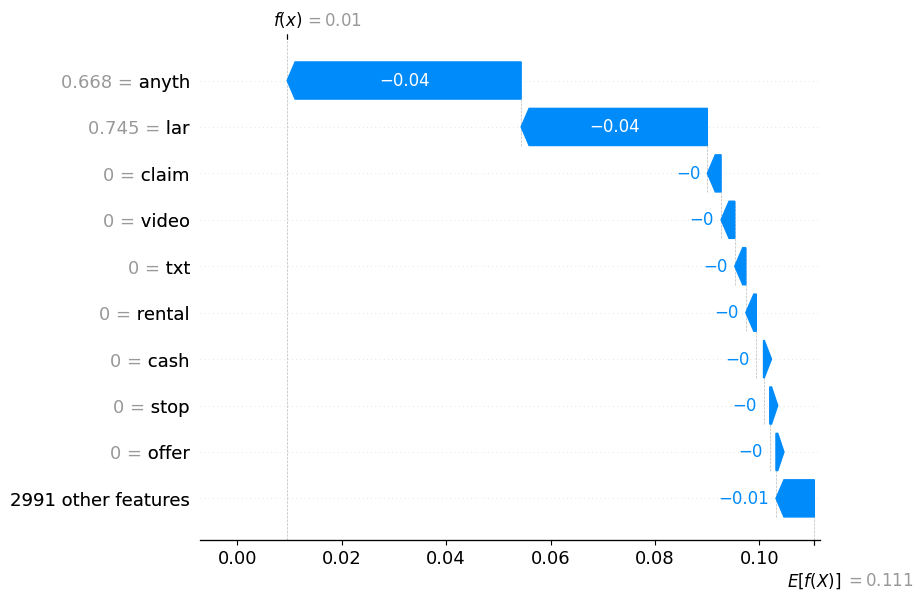

In [116]:
# prompt: SHAP is installed already. Implement SHAP

import shap

# Assuming 'mnb' and 'X_test' are already trained and available

# Create a callable function for SHAP that takes transformed data
def predict_proba_shap(transformed_texts):
  return mnb.predict_proba(transformed_texts)

# Create a SHAP explainer
# Use the trained Multinomial Naive Bayes model's predict_proba function
# and the transformed training data as the background
explainer = shap.Explainer(predict_proba_shap, X_train)

# Calculate SHAP values for a sample from the test set
# Choose an index from the test set to explain
idx_to_explain = 0 # Example: explain the first sample in the test set

# Ensure the index is within the bounds of the test set
if idx_to_explain >= len(X_test):
    print(f"Index {idx_to_explain} is out of bounds for the test set.")
else:
    # Reshape the single test sample to a 2D array
    test_sample_2d = X_test[idx_to_explain].reshape(1, -1)

    # Calculate SHAP values for the selected test sample
    # Set max_evals to at least 2 * num_features + 1 for the Permutation explainer
    shap_values = explainer(test_sample_2d, max_evals=2 * X_train.shape[1] + 1)

    # To get the feature names for better interpretation (requires the TF-IDF vectorizer)
    feature_names = tfidf.get_feature_names_out()

    # Create a SHAP Explanation object for the specific sample and class
    # Access the explanation for the first sample and the spam class (index 1)
    # Include the feature names and the base value (expected value) for this explainer
    explanation = shap.Explanation(values=shap_values.values[0, :, 1],
                                  base_values=shap_values.base_values[0, 1],
                                  data=test_sample_2d[0], # Original data point
                                  feature_names=feature_names)


    # Visualize the SHAP explanation using the Explanation object
    shap.initjs()
    shap.plots.waterfall(explanation)

    # Summary plot for the entire test set (can take time)
    # shap_values_test = explainer(X_test, max_evals=2 * X_train.shape[1] + 1)
    # shap.summary_plot(shap_values_test[:,:,1], X_test, feature_names=feature_names) # Also access spam class for summary plot

In [117]:
# prompt: Install and Import ELI5

!pip install eli5
import eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.4 MB/s eta 0:00:00


In [122]:
# prompt: As ELI5 imported, USE ELI5 provide word importance.

import eli5

# Explain the prediction for a specific sample
# Choose an index from the test set (using the row index of df_test)
idx_to_explain_eli5 = 0 # Example: explain the first sample in the test_df

# To get the original text for the sample, we need to use the index from the original df
# First, get the indices of the test set
test_indices = X_test.index if isinstance(X_test, pd.DataFrame) else np.arange(len(X_test))

# Ensure the index is within the bounds of the test set
if idx_to_explain_eli5 < len(test_indices):
    # Get the original index from the test set indices
    original_index = test_indices[idx_to_explain_eli5]

    # Get the original text directly from df using the original index
    original_text_sample = df['text'].iloc[original_index]

    # Display the explanation using eli5.show_weights (explains model weights)
    # This doesn't need a specific sample text
    print("ELI5 Explanation (Model Weights):")
    display(eli5.show_weights(mnb, vec=tfidf, feature_names=tfidf.get_feature_names_out(), target_names=class_names))

    # Explain a specific prediction using eli5.show_prediction
    # This requires the original text of the sample
    print("\nELI5 Explanation for a specific prediction:")
    display(eli5.show_prediction(mnb,
                               original_text_sample, # Pass the original text
                               vec=tfidf,
                               target_names=class_names))
else:
    print(f"Index {idx_to_explain_eli5} is out of bounds for the test set.")

ELI5 Explanation (Model Weights):



ELI5 Explanation for a specific prediction:


# N-grams and TF-IDF variations

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Assuming 'df' is your DataFrame with a 'transformed_text' column
tfidf_ngram = TfidfVectorizer(ngram_range=(1,3)) # Example with bi-grams
X_train_transformed_ngram = tfidf_ngram.fit_transform(df['transformed_text'])

In [127]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000) # Consider top 5000 features

In [128]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=5) # Ignore terms appearing in less than 5 documents
# OR
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=0.01) # Ignore terms appearing in less than 1% of documents

In [129]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9) # Ignore terms appearing in more than 90% of documents